## CS/Stat 118 F21 Lecture 6 Demos - Part 2  ##
### Comparisons, Control Flow (Conditonals and Iteration) and Intro to Randomness and Sampling ###
#### (now, with Pandas!)

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Boolean Data##

In [2]:
type(True)

bool

In [3]:
type(False)

bool

## Comparisons ##
### Expressions that evaluate to a Boolean (True or False) ###

In [4]:
3 > 1

True

In [5]:
type(3 > 1)

bool

In [6]:
# Recall that a single "=" already is used to mean assignment
# So we use a different symbol for an equality comparison
namex = 3

In [7]:
#In Python (and many other languages), we use "==" to represent an equality test
3 == 3

True

In [8]:
#If you want to test "not equal" you can use "!="
3 != 3

False

In [9]:
# you can, of course, mix literals and names
x = 5
y = 12

x == 7

False

In [10]:
y - x

7

In [11]:
#Precedence rules do arithmetic before comparisons
4 < y - x <= 8

True

In [12]:
4 < y - x

True

In [13]:
y - x <= 6

False

### Comparisions with Strings

#### In case you were wondering how strings get ordered, here are the numeric values that computers use to represent common characters:

<div>
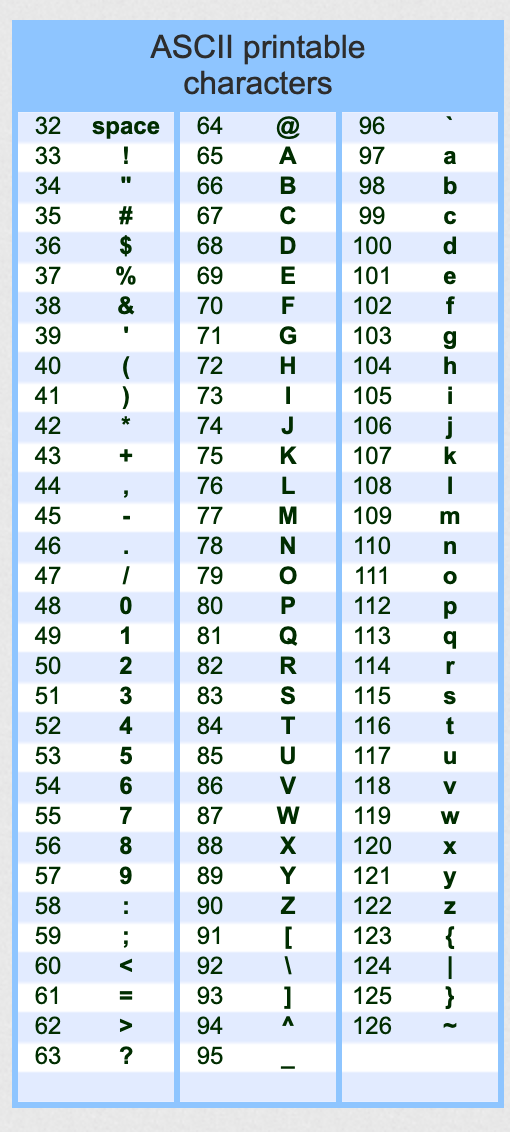
</div>


In [14]:
'cat' > 'dog'

False

In [15]:
"c" > "d"

False

In [16]:
#remember, case matters
#(here's one for cat lovers)
'cat' > 'DOG'

True

In [17]:
#spaces matter too!
' cat' > 'DOG'

False

In [18]:
'$' > 'A'

False

### Boolean Logic (i.e., reasoning with True and False)

**and**: X and Y is **True** if and only if X is **True** and Y is **True**

In [19]:
#AND: X and Y is True if and only if X is True and Y is True
True and False

False

In [20]:
True and True

True

In [21]:
#note that comparisons are evaluated before boolean comparisons
'cat' > 'dog' and 'dog' > 'cat'

False

**or**: X or Y is **True** if X, Y or both are **True**

In [22]:
True or False

True

In [23]:
False or False

False

In [24]:
'cat' > 'dog' or 'dog' > 'cat'

True

In [25]:
#You can create boolean variables too
x = True or False
x

True

**not**: inverts a boolean value

In [26]:
not(x)

False

In [27]:
not('cat' > 'dog' or 'dog' > 'cat')

False

In [28]:
pets = np.array(['dog', 'dog', 'cat', 'cat', 'rabbit'])

In [29]:
#applying comparisons to arrays
pets == 'dog'

array([ True,  True, False, False, False])

In [30]:
# Note that the value False is 0 and the value True is 1
sum(np.array([True, True, False, False, False]))

2

In [33]:
sum(pets != 'dog')

3

In [34]:
#How many dogs are in our array?
np.count_nonzero(pets == 'dog')

2

In [35]:
pets > 'cat'

array([ True,  True, False, False,  True])

In [36]:
sum(pets > 'cat')

3

### Now we can apply boolean logic to Dataframes

In [37]:
# create a data frame of academic terms (on the quarter system)
terms = pd.DataFrame()
terms['Quarters'] = np.arange(1, 13)
terms

,Quarters
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [38]:
terms.query('Quarters != 6')

,Quarters
0,1
1,2
2,3
3,4
4,5
6,7
7,8
8,9
9,10
10,11


In [39]:
#Here's a definition: seniors are in quarters 10, 11, or 12 of their studies
def senior(x):
    return x > 9

In [41]:
senior(1)

False

In [42]:
terms.Quarters.apply(lambda x: x>9)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
Name: Quarters, dtype: bool

In [43]:
terms

,Quarters
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [44]:
#Apply the senior() functuion to each row of terms
#note: result is a Series
terms.Quarters.apply(senior)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
Name: Quarters, dtype: bool

In [45]:
terms

,Quarters
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [46]:
#If we want a DataFrame we can create a new one with the above result as a column
senior_terms = terms
senior_terms['Senior??'] = terms.Quarters.apply(senior)
senior_terms
terms

,Quarters,Senior??
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
5,6,False
6,7,False
7,8,False
8,9,False
9,10,True


In [ ]:
print(id(senior_terms))
print(id(terms))

## Conditional Statements ##

In [47]:
#define a function to determine class year from quarter
def year_from_quarters(x):
    if  x <= 0:
        return 'Not a valid input'
    elif x <= 3:
        return 'First_Year'
    elif x <= 6:
        return 'Second_Year'
    elif x <= 9:
        return 'Third_Year'
    elif x <= 12:
        return 'Fourth_Year' 
    else:
        return 'Please_graduate'

In [48]:
year_from_quarters(12)

'Fourth_Year'

In [49]:
#what about for really small or really large values (errors?)
year_from_quarters(-1)

'Not a valid input'

In [50]:
terms.Quarters.apply(year_from_quarters)

0      First_Year
1      First_Year
2      First_Year
3     Second_Year
4     Second_Year
5     Second_Year
6      Third_Year
7      Third_Year
8      Third_Year
9     Fourth_Year
10    Fourth_Year
11    Fourth_Year
Name: Quarters, dtype: object

In [51]:
#let's use apply to create a new dataframe
named_terms = terms
named_terms['Year'] = terms.Quarters.apply(year_from_quarters)
named_terms

,Quarters,Senior??,Year
0,1,False,First_Year
1,2,False,First_Year
2,3,False,First_Year
3,4,False,Second_Year
4,5,False,Second_Year
5,6,False,Second_Year
6,7,False,Third_Year
7,8,False,Third_Year
8,9,False,Third_Year
9,10,True,Fourth_Year


## Appending Arrays ##

In [52]:
first = np.arange(1, 6)
second = np.arange(6, 11)

In [53]:
first

array([1, 2, 3, 4, 5])

In [54]:
np.append(first, 300)

array([  1,   2,   3,   4,   5, 300])

In [55]:
#append does not modify the original array
first

array([1, 2, 3, 4, 5])

In [56]:
#to accomplish that you must use assignment
first = np.append(first,300)

In [57]:
first

array([  1,   2,   3,   4,   5, 300])

In [58]:
allnum = np.append(first, second)

In [59]:
allnum

array([  1,   2,   3,   4,   5, 300,   6,   7,   8,   9,  10])

## Random Selection ##

In [60]:
two_groups = ['treatment', 'control']

In [63]:
np.random.choice(two_groups)

'treatment'

In [72]:
np.random.choice(two_groups, 7)

array(['treatment', 'control', 'treatment', 'control', 'control',
       'treatment', 'control'], dtype='<U9')

In [73]:
sum(np.random.choice(two_groups, 7) == 'treatment')

3

In [69]:
sum(np.random.choice(two_groups, 7) == 'control')

5

In [74]:
outcomes = np.random.choice(two_groups, 7)

In [75]:
outcomes

array(['treatment', 'treatment', 'control', 'treatment', 'treatment',
       'treatment', 'control'], dtype='<U9')

In [76]:
outcomes == 'treatment'

array([ True,  True, False,  True,  True,  True, False])

In [77]:
sum(outcomes == 'treatment')

5

In [78]:
outcomes == 'control'

array([False, False,  True, False, False, False,  True])

In [79]:
sum(outcomes == 'control')

2

In [80]:
outcomes !='control'

array([ True,  True, False,  True,  True,  True, False])

In [81]:
sum(outcomes !='control')

5

In [84]:
#For experimental purposes, you may want to flip a coin
#First you can create a fair coin as follows
coin = ['heads', 'tails']

In [87]:
np.random.choice(coin)

'heads'

In [90]:
tosses = np.random.choice(coin, 100)
tosses

array(['tails', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads',
       'heads', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails',
       'heads', 'heads', 'heads', 'tails', 'heads', 'tails', 'tails',
       'heads', 'heads', 'tails', 'tails', 'tails', 'tails', 'heads',
       'tails', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails',
       'heads', 'heads', 'heads', 'heads', 'heads', 'heads', 'heads',
       'tails', 'tails', 'tails', 'heads', 'heads', 'heads', 'heads',
       'heads', 'tails', 'heads', 'tails', 'tails', 'tails', 'heads',
       'tails', 'tails', 'tails', 'tails', 'tails', 'heads', 'tails',
       'heads', 'heads', 'heads', 'tails', 'tails', 'tails', 'heads',
       'heads', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails',
       'heads', 'tails', 'heads', 'tails', 'tails', 'tails', 'heads',
       'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'heads',
       'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'heads',
       'heads', 'hea

In [91]:
sum(tosses == 'heads')

61

In [92]:
#let's create an empty array (we'll add things to it later)
outcomes = np.empty(0)

In [93]:
outcomes

array([], dtype=float64)

In [94]:
np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))

array([46.])

In [95]:
#recall that append doesn't change the input array
outcomes

array([], dtype=float64)

In [99]:
#so if you want to do that, you need to use assignment
#By running this repeatedly, you can create an array of random trial outcomes
outcomes = np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))
outcomes

array([56., 54., 47., 52.])

#### That's a lot of clicking!  Isn't there a more automatic way?

### Yes!

## For Statements ##

In [100]:
#let's create some lists 
adj = ["red","rotten","tasty"]
fruits = ["apple","banana","cherry"]

In [101]:
#'for' iterates over the contents of a list (or an array, or a series...)
for y in adj:
    print(y)

red
rotten
tasty


In [102]:
# Question: How many times will "print()" be called in this example?
for a in adj:
    for f in fruits:
        print(a,f)

red apple
red banana
red cherry
rotten apple
rotten banana
rotten cherry
tasty apple
tasty banana
tasty cherry


In [104]:
#Or we can pick random combinations
combos = input("How many combinations to generate? ")
for i in np.arange(int(combos)):
    print(np.random.choice(adj) + ' ' + np.random.choice(fruits))

How many combinations to generate? 10
tasty cherry
rotten apple
tasty cherry
rotten apple
red apple
tasty cherry
rotten cherry
tasty cherry
red cherry
tasty banana


In [119]:

# We can also experiment with simulated coin flips
coin = ['heads', 'tails']
is_heads = np.empty(0)

#note - be careful with this setting!  It's pretty easy to set up a long run...
num_experiments = 100000


for i in np.arange(num_experiments):
    #Each experiment consists of 100 coin flips
    is_heads = np.append(is_heads, sum(np.random.choice(coin, 100) == 'heads'))

# Since these aren't indented, they are outside of the "for" loop
print('    Number of experiments:', len(is_heads))
print('    Min Heads (out of 100):', min(is_heads))
print('    Max Heads (out of 100):', max(is_heads))
print('    Mean Heads(out of 100):', round(np.mean(is_heads)))

    Number of experiments: 100000
    Min Heads (out of 100): 29.0
    Max Heads (out of 100): 73.0
    Mean Heads(out of 100): 50.0


In [113]:
#If you want to see the contents of the result array
is_heads

array([45., 47., 52., 52., 51., 56., 56., 49., 56., 46., 43., 55., 47.,
       62., 53., 42., 47., 51., 48., 51., 53., 51., 62., 52., 48., 47.,
       49., 47., 56., 65., 54., 48., 46., 55., 52., 48., 55., 52., 46.,
       45., 45., 50., 52., 51., 51., 52., 54., 39., 53., 44., 60., 48.,
       47., 41., 50., 48., 47., 40., 55., 40., 56., 45., 56., 49., 47.,
       39., 51., 53., 46., 52., 56., 53., 57., 53., 56., 54., 45., 52.,
       54., 40., 45., 56., 52., 58., 52., 50., 57., 53., 50., 57., 44.,
       56., 54., 45., 54., 51., 49., 55., 40., 53.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd989ce3390>]],
      dtype=object)

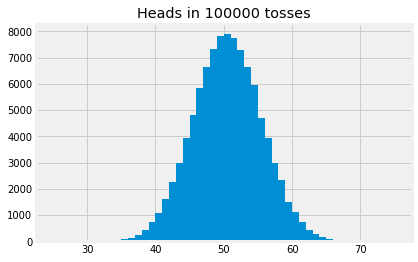

In [120]:
# Let's visualize the distribution!
legend = 'Heads in ' + str(num_experiments) + ' tosses'
pd.DataFrame(
    {legend: is_heads
    }).hist(bins = np.arange(25, 76))

## Intro to Sampling using Pandas dataframes ##

In [ ]:
#create a virtual die (6 sided)
die = pd.DataFrame(
    {'Face': np.arange(1, 7)
    })
die

In [ ]:
#sample() lets you randomly select a row from the dataframe
die.sample(1)

### If I want to roll the die multiple times, should "replace" be True or False?

In [ ]:
#let's roll 10 times
die.sample(10, replace=????)

### Okay, time to do some Data Visualization!

In [ ]:
#note, starting the bins at 0.5 will give us bars centered nicely over the face numbers
roll_bins = np.arange(0.5, 7, 1)
roll_bins

In [ ]:
die.sample(12,replace=True).hist(bins = roll_bins)

In [ ]:
die.sample(1000,replace=True).hist(bins = roll_bins)

In [ ]:
die.sample(10000,replace=True).hist(bins = roll_bins)

In [ ]:
die.sample(100000,replace=True).hist(bins = roll_bins)

In [ ]:
die.sample(1000000,replace=True).hist(bins = roll_bins)